# Life Expectancy

### Import libraries

In [1]:
#%matplotlib inline
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# !pip install seaborn

In [2]:
# load the dataset
df = pd.read_csv("Life_expectancy_v2.csv")

### Data Overview

In [3]:
df.head(10)

Continent      Country  Year      Status  Life expectancy  Adult Mortality  \
0      Asia  Afghanistan  2015  Developing             65.0            263.0   
1      Asia  Afghanistan  2014  Developing             59.9            271.0   
2      Asia  Afghanistan  2013  Developing             59.9            268.0   
3      Asia  Afghanistan  2012  Developing             59.5            272.0   
4      Asia  Afghanistan  2011  Developing             59.2            275.0   
5      Asia  Afghanistan  2010  Developing             58.8            279.0   
6      Asia  Afghanistan  2009  Developing             58.6            281.0   
7      Asia  Afghanistan  2008  Developing             58.1            287.0   
8      Asia  Afghanistan  2007  Developing             57.5            295.0   
9      Asia  Afghanistan  2006  Developing             57.3            295.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  ...  Polio  \
0             62     0.01               71.279624         65.0  ...    6.0   
1             64     0.01               73.523582         62.0  ...   58.0   
2             66     0.01               73.219243         64.0  ...   62.0   
3             69     0.01               78.184215         67.0  ...   67.0   
4             71     0.01                7.097109         68.0  ...   68.0   
5             74     0.01               79.679367         66.0  ...   66.0   
6             77     0.01               56.762217         63.0  ...   63.0   
7             80     0.03               25.873925         64.0  ...   64.0   
8             82     0.02               10.910156         63.0  ...   63.0   
9             84     0.03               17.171518         64.0  ...   58.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   
5               9.20        66.0       0.1  553.328940   2883167.0   
6               9.42        63.0       0.1  445.893298    284331.0   
7               8.33        64.0       0.1  373.361116   2729431.0   
8               6.73        63.0       0.1  369.835796  26616792.0   
9               7.43        58.0       0.1  272.563770   2589345.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   
5                  18.4                18.4                            0.448   
6                  18.6                18.7                            0.434   
7                  18.8                18.9                            0.433   
8                  19.0                19.1                            0.415   
9                  19.2                19.3                            0.405   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  
5        9.2  
6        8.9  
7        8.7  
8        8.4  
9        8.1  

[10 rows x 23 columns]

In [4]:
df.shape

(2938, 23)

In [5]:
df.columns

Index(['Continent', 'Country', 'Year', 'Status', 'Life expectancy',
       'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Continent                        2938 non-null   object 
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Life expectancy                  2928 non-null   float64
 5   Adult Mortality                  2928 non-null   float64
 6   Infant deaths                    2938 non-null   int64  
 7   Alcohol                          2744 non-null   float64
 8   Percentage expenditure           2938 non-null   float64
 9   Hepatitis B                      2385 non-null   float64
 10  Measles                          2938 non-null   int64  
 11  BMI                              2904 non-null   float64
 12  Under-five deaths   

In [7]:
# general statistical summary
df.describe(include="all").T

count unique          top  freq  \
Continent                          2938      6       Africa   864   
Country                            2938    193  Afghanistan    16   
Year                             2938.0    NaN          NaN   NaN   
Status                             2938      2   Developing  2426   
Life expectancy                  2928.0    NaN          NaN   NaN   
Adult Mortality                  2928.0    NaN          NaN   NaN   
Infant deaths                    2938.0    NaN          NaN   NaN   
Alcohol                          2744.0    NaN          NaN   NaN   
Percentage expenditure           2938.0    NaN          NaN   NaN   
Hepatitis B                      2385.0    NaN          NaN   NaN   
Measles                          2938.0    NaN          NaN   NaN   
BMI                              2904.0    NaN          NaN   NaN   
Under-five deaths                2938.0    NaN          NaN   NaN   
Polio                            2919.0    NaN          NaN   NaN   
Total expenditure                2712.0    NaN          NaN   NaN   
Diphtheria                       2919.0    NaN          NaN   NaN   
HIV/AIDS                         2938.0    NaN          NaN   NaN   
GDP                              2490.0    NaN          NaN   NaN   
Population                       2286.0    NaN          NaN   NaN   
Thinness  1-19 years             2904.0    NaN          NaN   NaN   
Thinness 5-9 years               2904.0    NaN          NaN   NaN   
Income composition of resources  2771.0    NaN          NaN   NaN   
Schooling                        2775.0    NaN          NaN   NaN   

                                            mean              std      min  \
Continent                                    NaN              NaN      NaN   
Country                                      NaN              NaN      NaN   
Year                                  2007.51872         4.613841   2000.0   
Status                                       NaN              NaN      NaN   
Life expectancy                        69.224932         9.523867     36.3   
Adult Mortality                       164.796448       124.292079      1.0   
Infant deaths                          30.303948       117.926501      0.0   
Alcohol                                 4.602861         4.052413     0.01   
Percentage expenditure                738.251295      1987.914858      0.0   
Hepatitis B                            80.940461        25.070016      1.0   
Measles                               2419.59224     11467.272489      0.0   
BMI                                    38.321247        20.044034      1.0   
Under-five deaths                      42.035739       160.445548      0.0   
Polio                                  82.550188        23.428046      3.0   
Total expenditure                        5.93819          2.49832     0.37   
Diphtheria                             82.324084        23.716912      2.0   
HIV/AIDS                                1.742103         5.077785      0.1   
GDP                                  7483.158469     14270.169342  1.68135   
Population                       12753375.120052  61012096.508428     34.0   
Thinness  1-19 years                    4.839704         4.420195      0.1   
Thinness 5-9 years                      4.870317         4.508882      0.1   
Income composition of resources         0.627551         0.210904      0.0   
Schooling                              11.992793          3.35892      0.0   

                                        25%          50%          75%  \
Continent                               NaN          NaN          NaN   
Country                                 NaN          NaN          NaN   
Year                                 2004.0       2008.0       2012.0   
Status                                  NaN          NaN          NaN   
Life expectancy                        63.1         72.1         75.7   
Adult Mortality                        74.0        144.0        22

In [8]:
# dropping missing values in the target
df = df.dropna(subset=["Life expectancy"])

In [9]:
df.shape

(2928, 23)

In [10]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")
numeric_columns

['Life expectancy',
 'Adult Mortality',
 'Infant deaths',
 'Alcohol',
 'Percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 years',
 'Thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [11]:
# filling missing values using the column median for the predictor variables
# def medianFiller_funtion(x):
#     x = x.fillna(x.median())
#     return x

medianFiller = lambda x: x.fillna(x.median())
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [12]:
df.isnull().sum()

Continent                          0
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## EDA

### Univariate analysis

**Let's explore the dependent variable *Life expectancy***

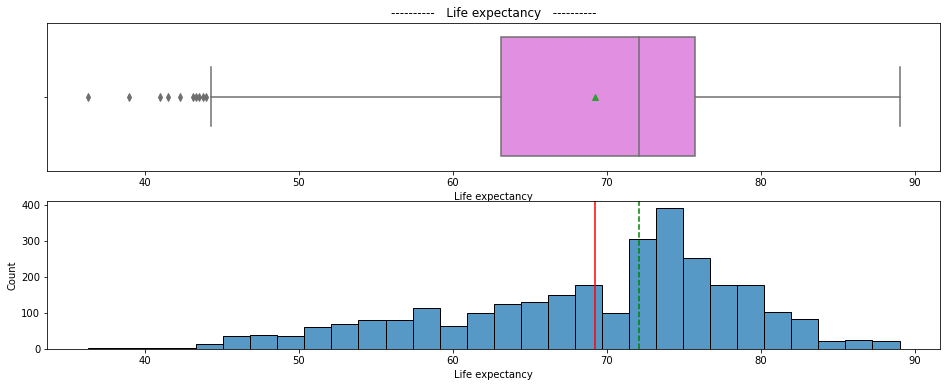

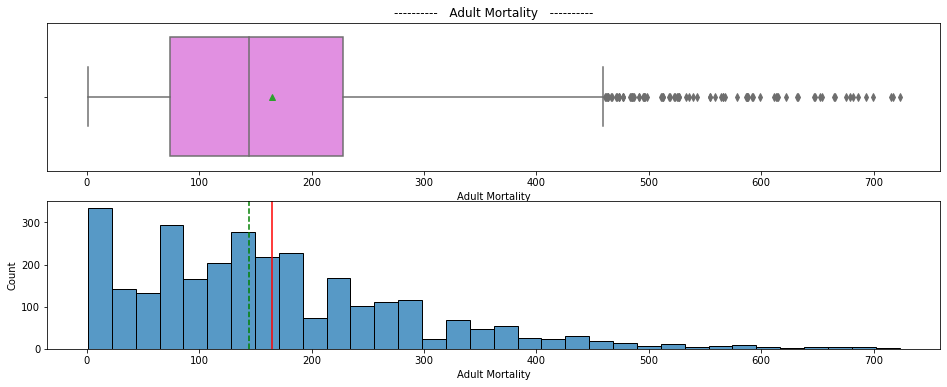

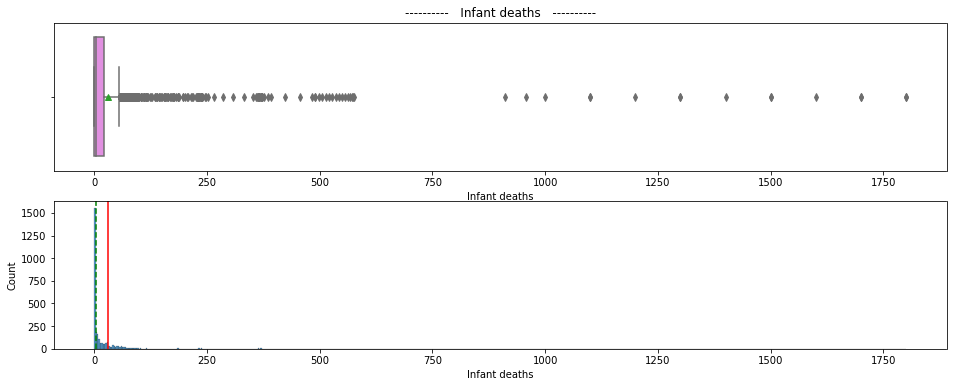

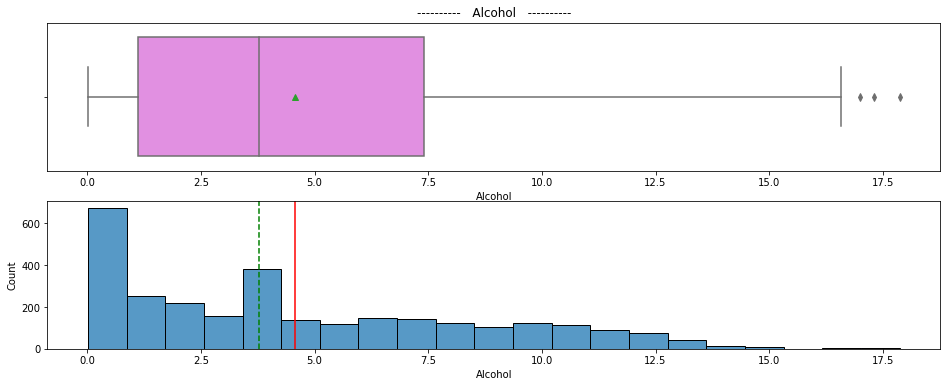

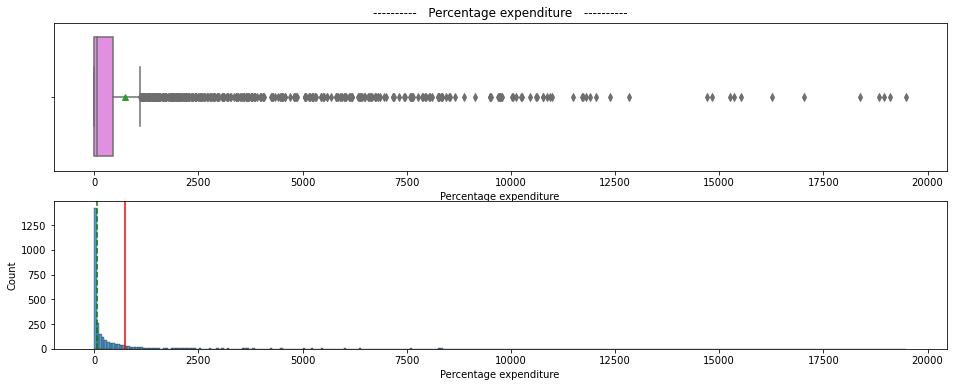

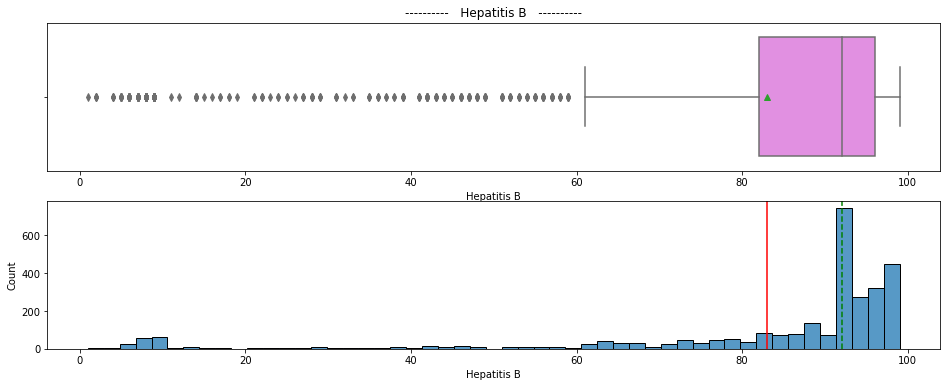

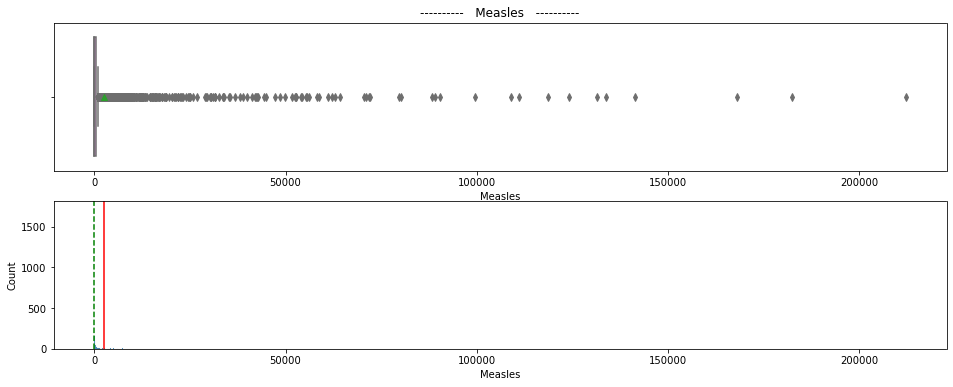

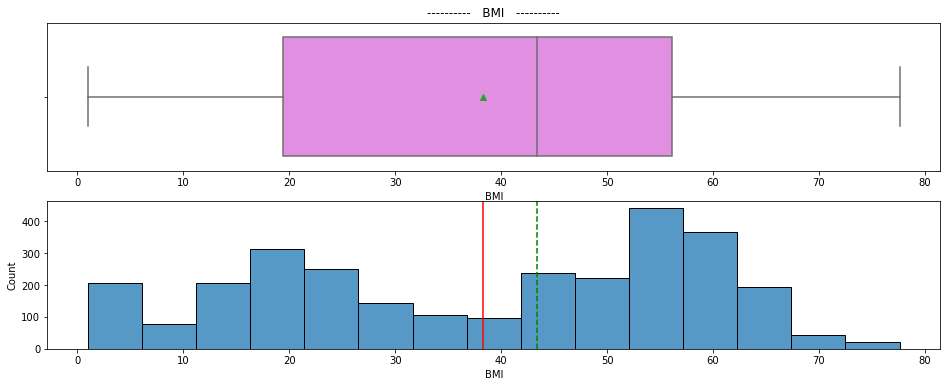

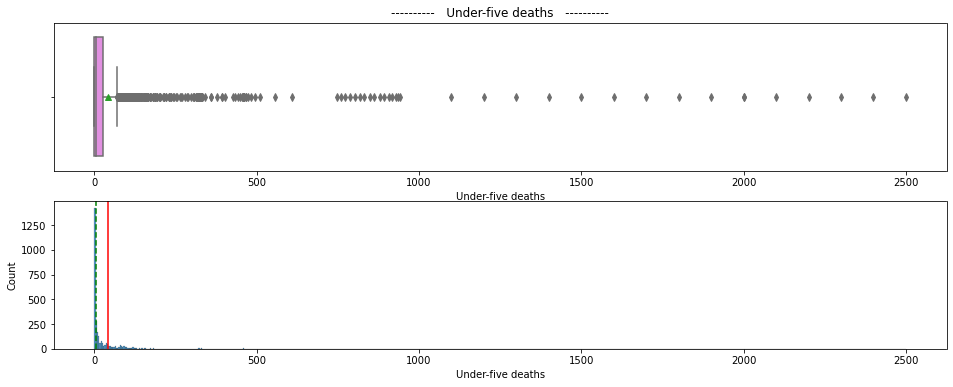

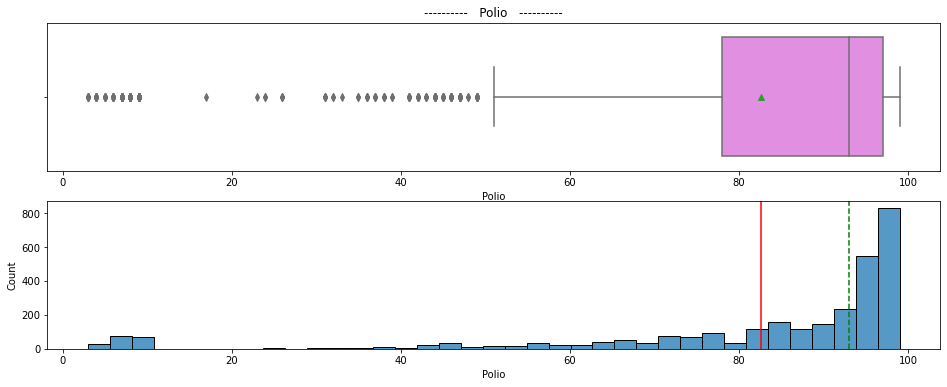

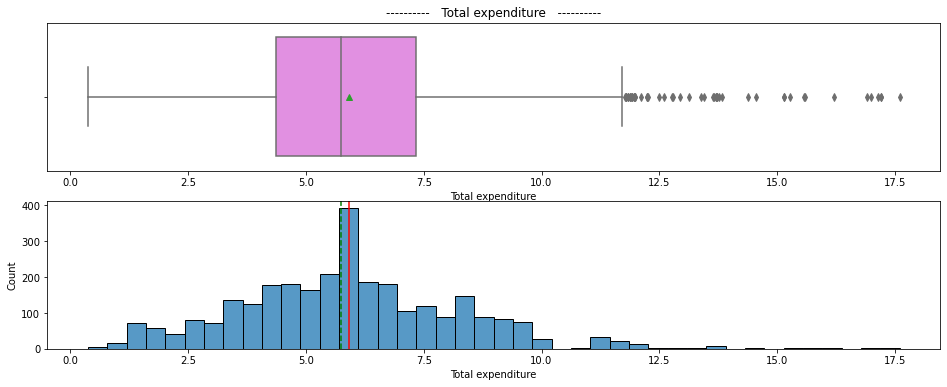

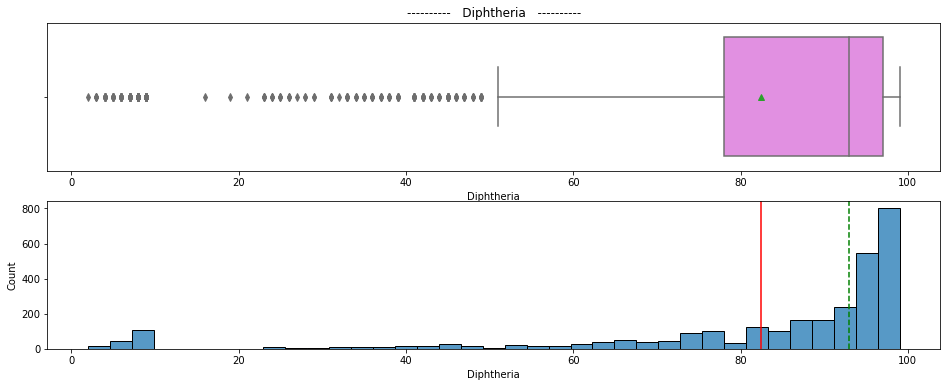

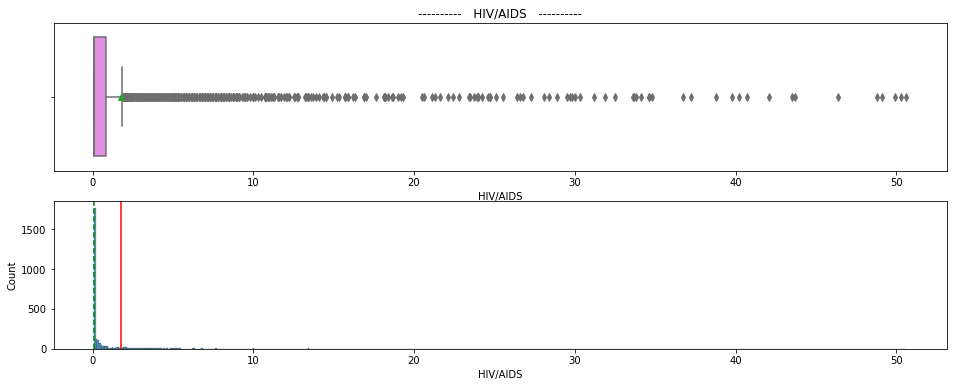

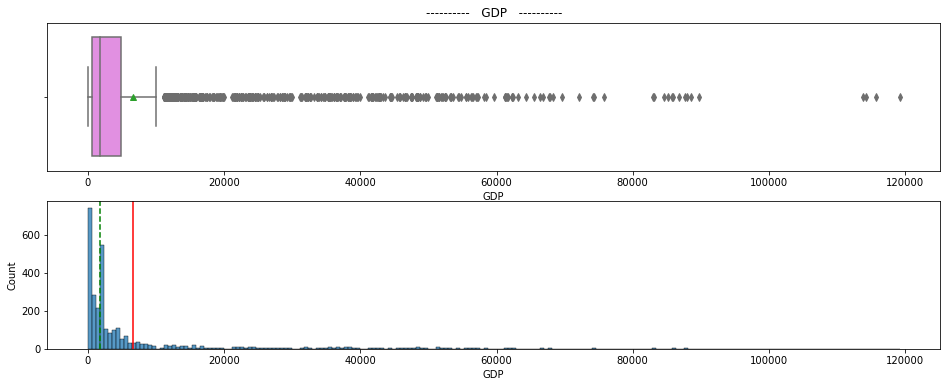

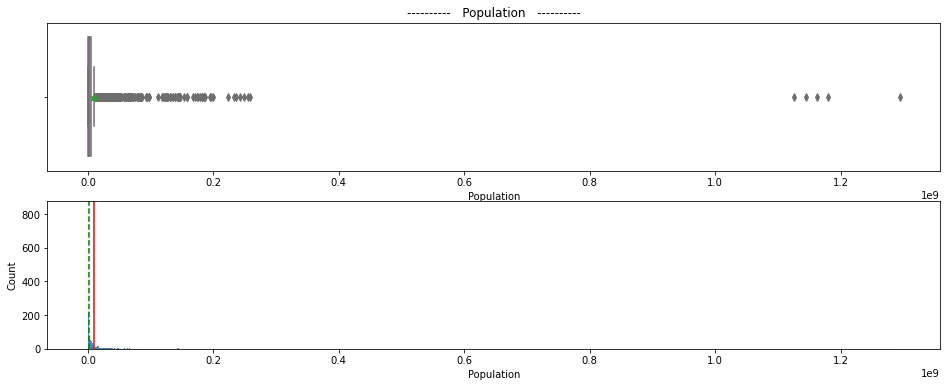

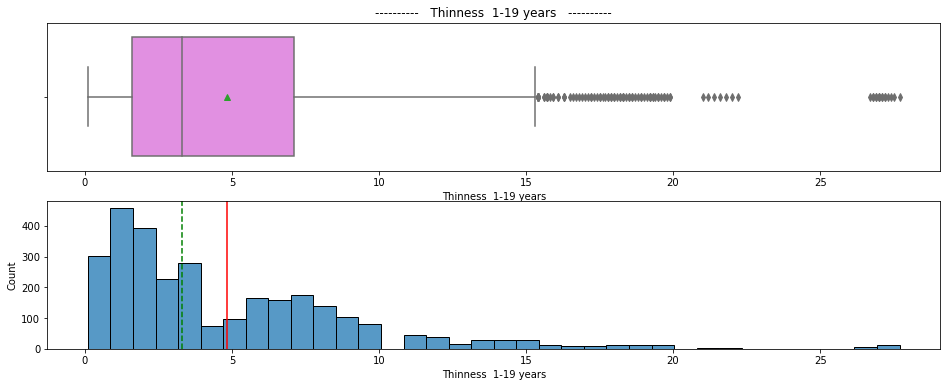

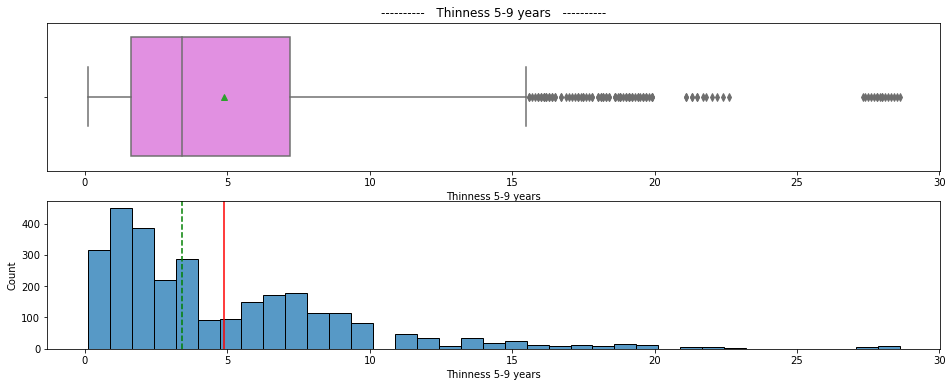

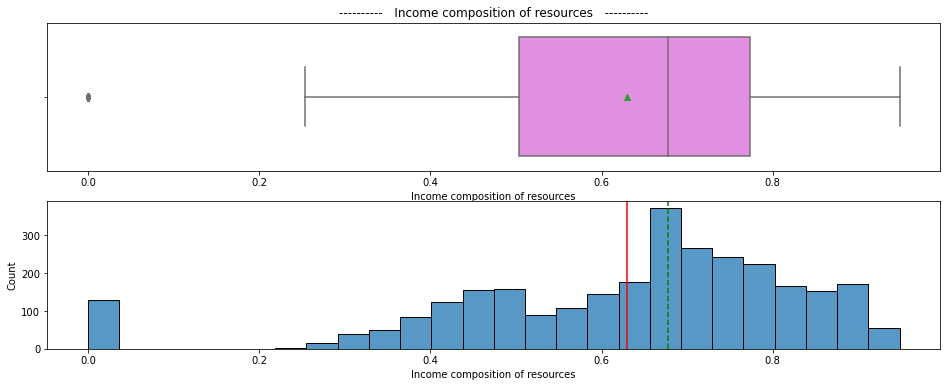

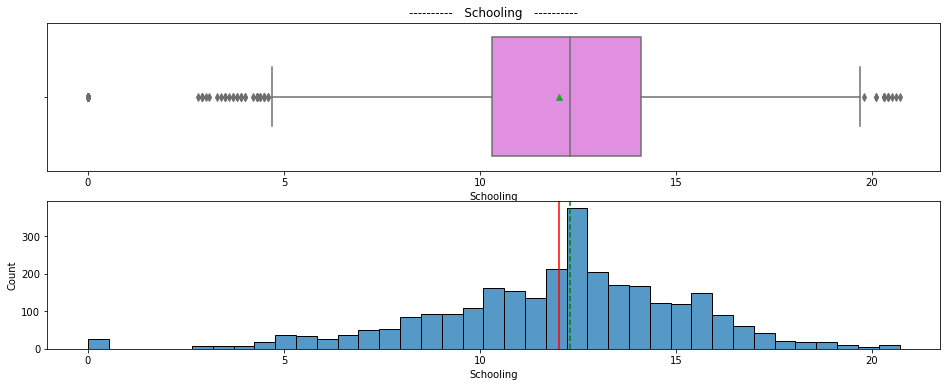

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=df, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=df, x=col)
    plt.axvline(df[col].mean(), color="red", linestyle="-")
    plt.axvline(df[col].median(), color="green", linestyle="--")
    plt.show()

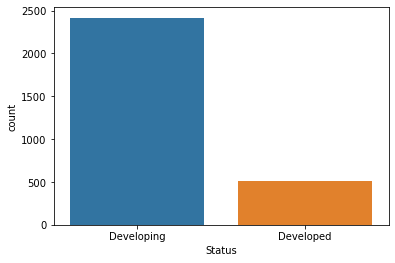

In [14]:
sns.countplot(data=df, x="Status")
plt.show()

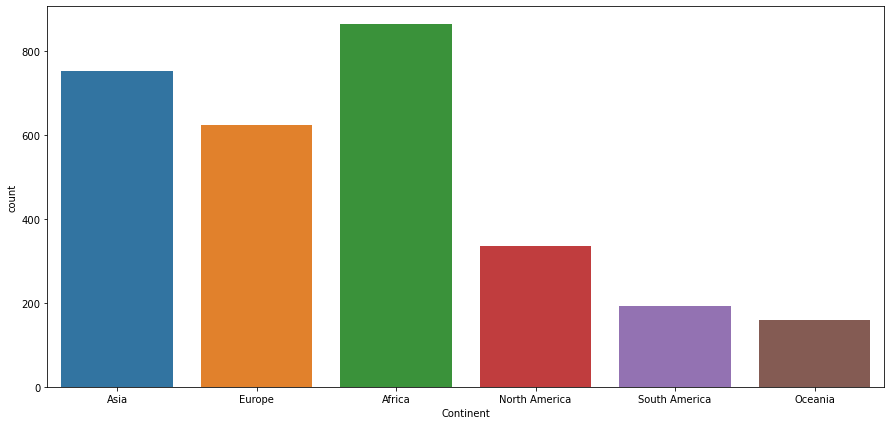

In [15]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x="Continent")
plt.show()

### Bivariate Analysis

In [16]:
# correlation of all attributes with life expectancy
df[numeric_columns].corr()["Life expectancy"]

Life expectancy                    1.000000
Adult Mortality                   -0.696359
Infant deaths                     -0.196557
Alcohol                            0.390674
Percentage expenditure             0.381864
Hepatitis B                        0.171255
Measles                           -0.157586
BMI                                0.558888
Under-five deaths                 -0.222529
Polio                              0.459458
Total expenditure                  0.209588
Diphtheria                         0.473268
HIV/AIDS                          -0.556556
GDP                                0.430991
Population                        -0.028842
Thinness  1-19 years              -0.467859
Thinness 5-9 years                -0.462645
Income composition of resources    0.688591
Schooling                          0.717314
Name: Life expectancy, dtype: float64

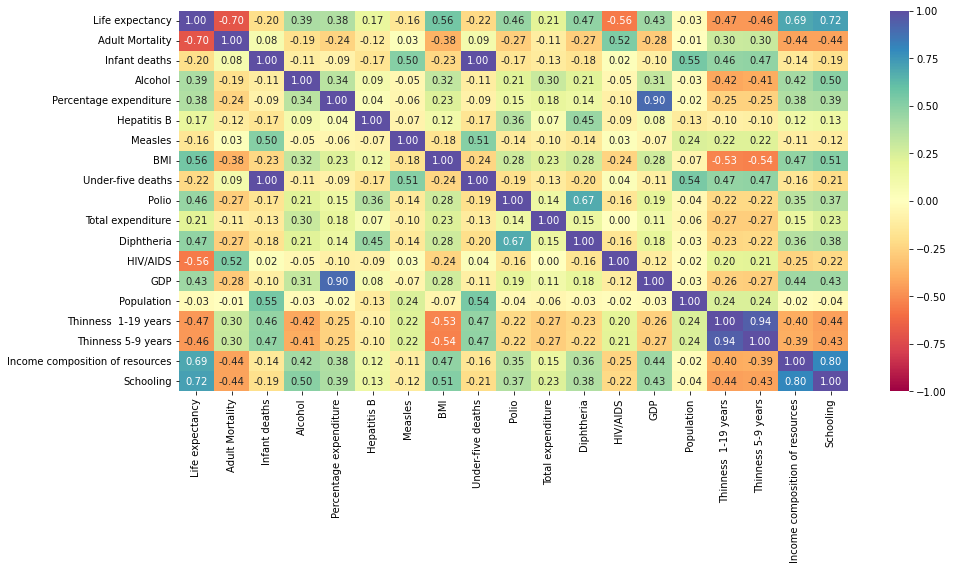

In [17]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

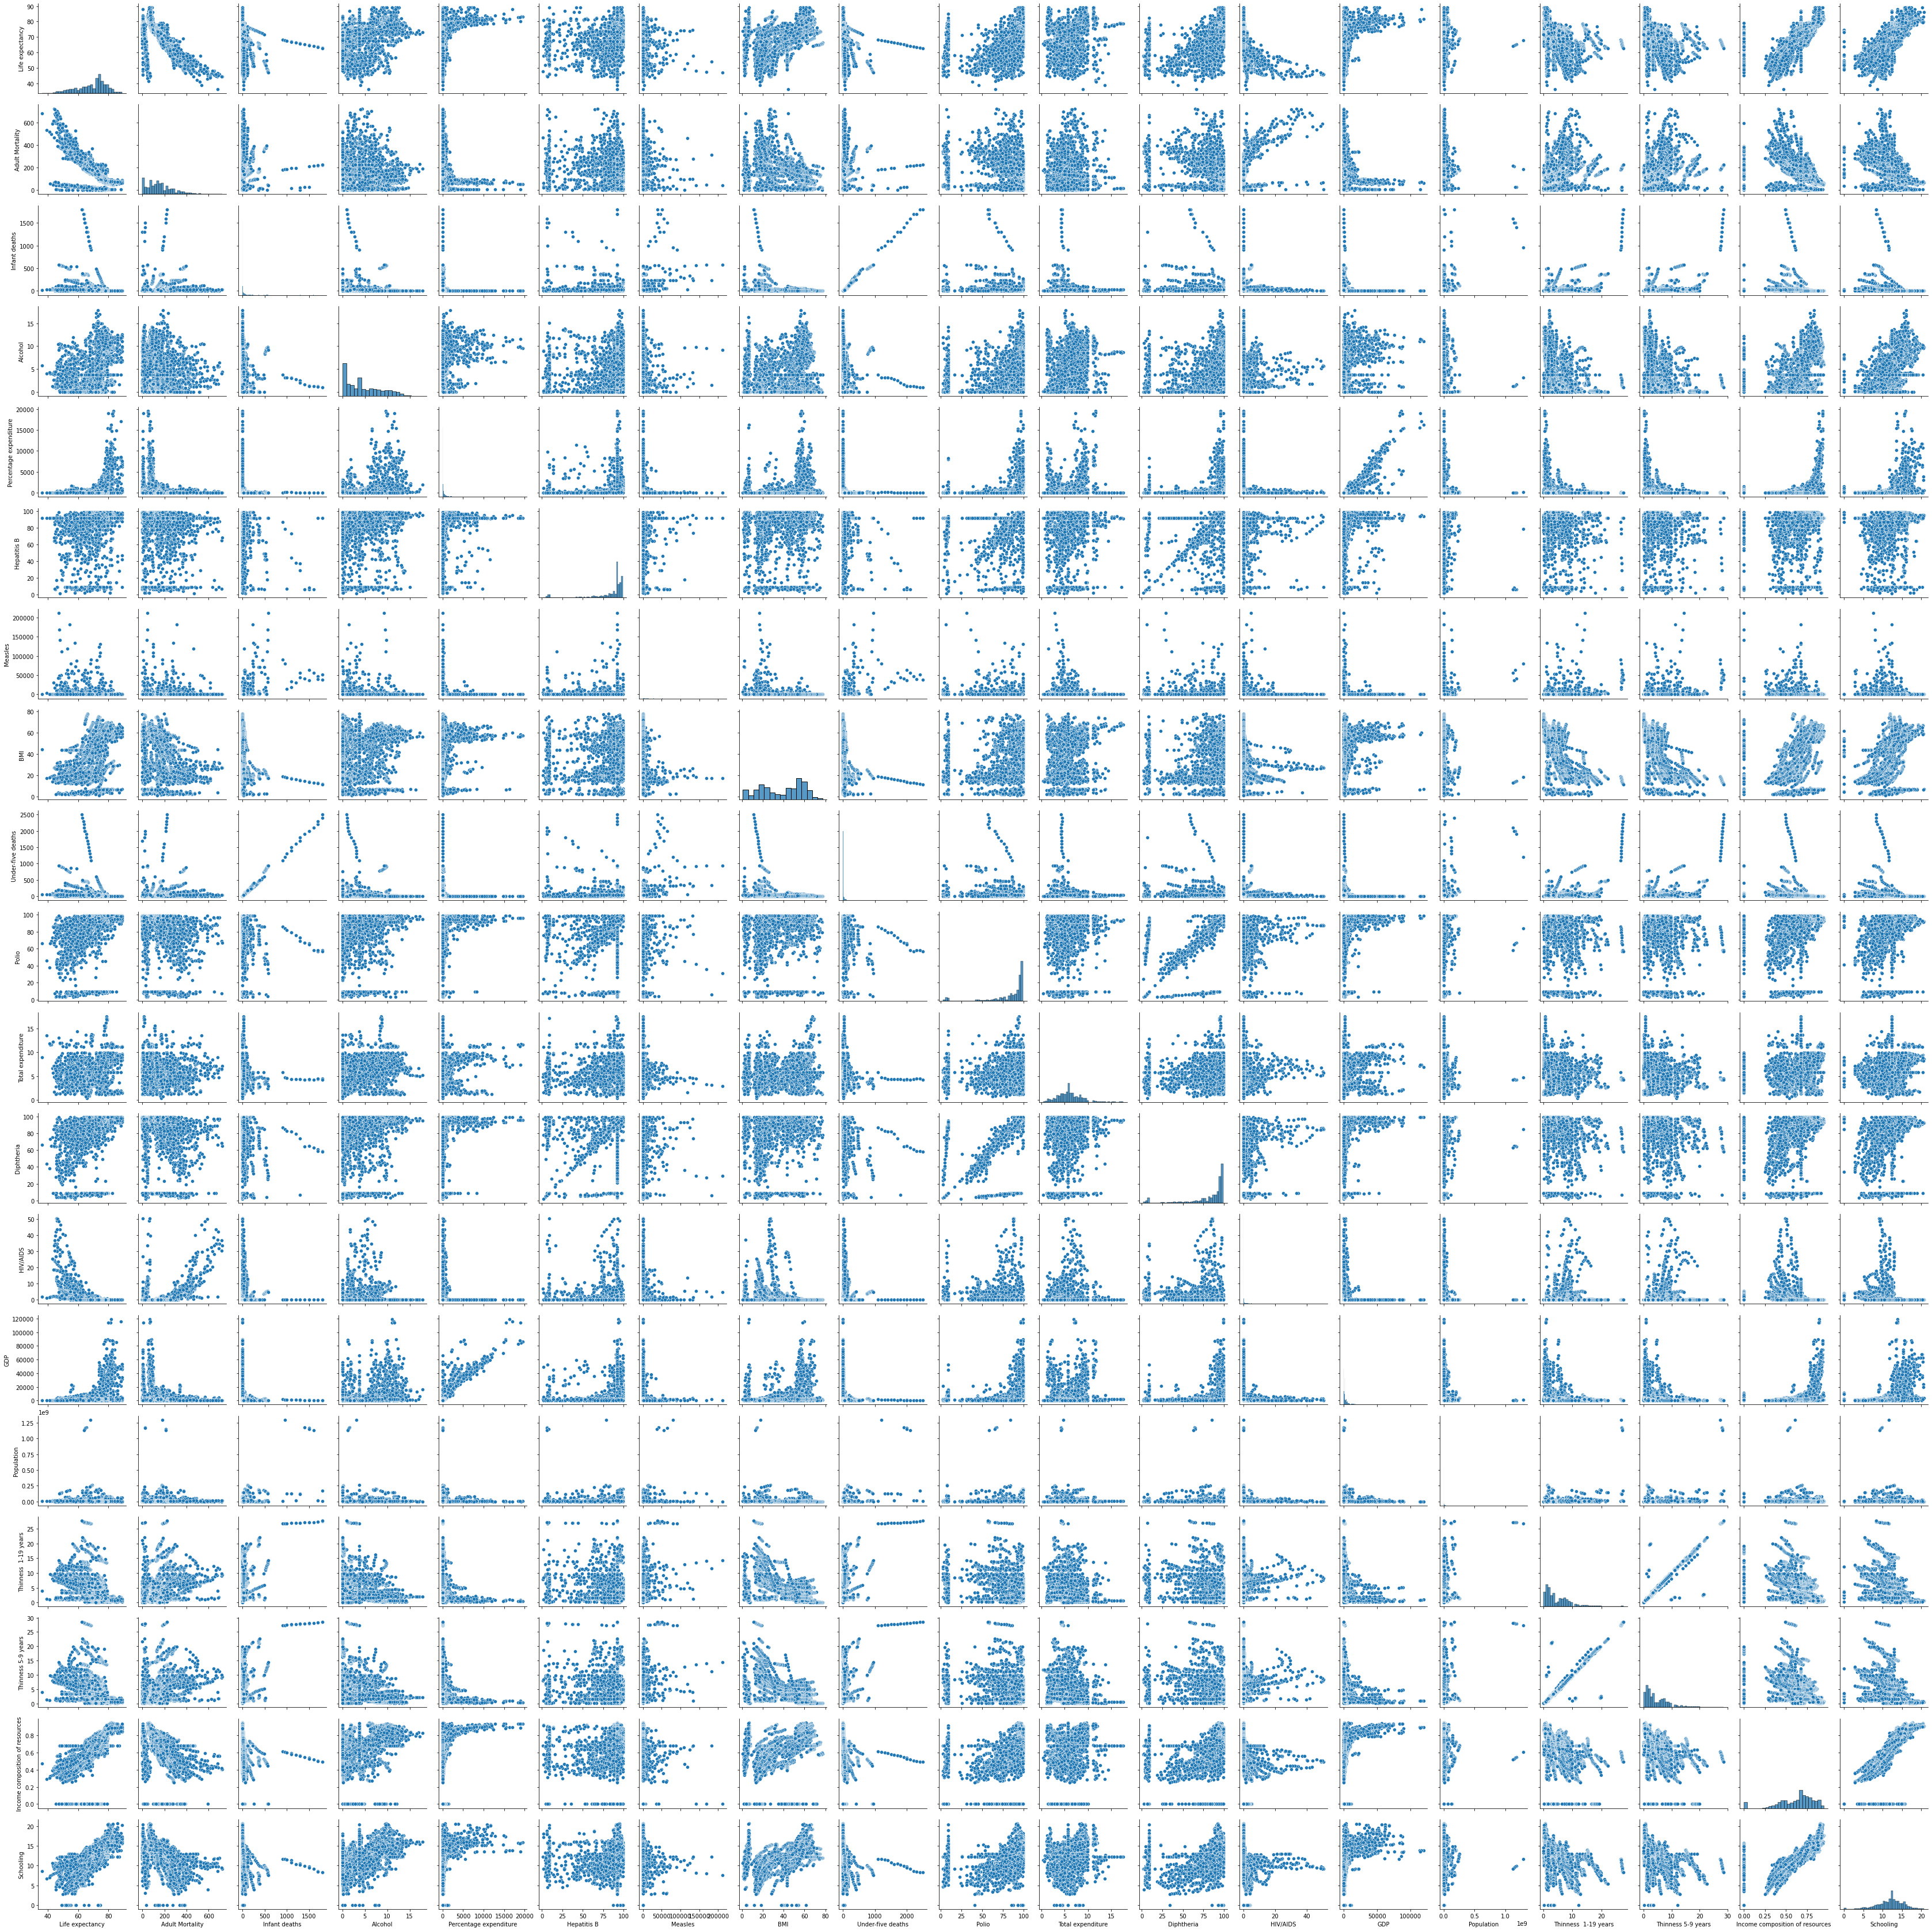

In [18]:
sns.pairplot(data=df[numeric_columns])
plt.show()

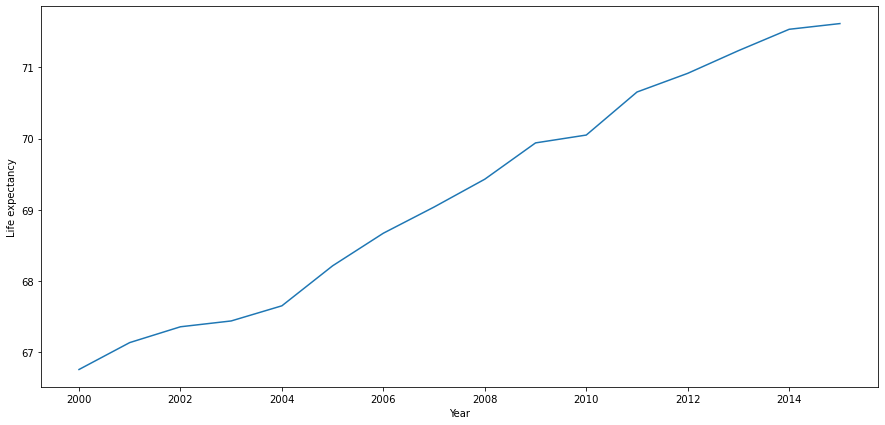

In [19]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Life expectancy", data=df, ci=None)
plt.show()

## Linear Regression Model Building


In [20]:
df.head()

Continent      Country  Year      Status  Life expectancy  Adult Mortality  \
0      Asia  Afghanistan  2015  Developing             65.0            263.0   
1      Asia  Afghanistan  2014  Developing             59.9            271.0   
2      Asia  Afghanistan  2013  Developing             59.9            268.0   
3      Asia  Afghanistan  2012  Developing             59.5            272.0   
4      Asia  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  ...  Polio  \
0             62     0.01               71.279624         65.0  ...    6.0   
1             64     0.01               73.523582         62.0  ...   58.0   
2             66     0.01               73.219243         64.0  ...   62.0   
3             69     0.01               78.184215         67.0  ...   67.0   
4             71     0.01                7.097109         68.0  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 23 columns]

In [21]:
# defining X and y variables
X = df.drop(["Life expectancy", "Year", "Country"], axis=1)
y = df["Life expectancy"]

In [22]:
X.head()

Continent      Status  Adult Mortality  Infant deaths  Alcohol  \
0      Asia  Developing            263.0             62     0.01   
1      Asia  Developing            271.0             64     0.01   
2      Asia  Developing            268.0             66     0.01   
3      Asia  Developing            272.0             69     0.01   
4      Asia  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [23]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2928, dtype: float64

In [24]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

Adult Mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  Measles   BMI  Under-five deaths  Polio  Total expenditure  \
0         65.0     1154  19.1                 83    6.0               8.16   
1         62.0      492  18.6                 86   58.0               8.18   
2         64.0      430  18.1                 89   62.0               8.13   
3         67.0     2787  17.6                 93   67.0               8.52   
4         68.0     3013  17.2                 97   68.0               7.87   

   ...  Thinness  1-19 years  Thinness 5-9 years  \
0  ...                  17.2                17.3   
1  ...                  17.5                17.5   
2  ...                  17.7                17.7   
3  ...                  17.9                18.0   
4  ...                  18.2                18.2   

   Income composition of resources  Schooling  Continent_Asia  \
0                            0.479       10.1               1   
1                            0.476       10.0               1   
2                            0.470        9.9               1   
3                            0.463        9.8               1   
4                            0.454        9.5               1   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 0                        0                  0   

   Continent_South America  Status_Developing  
0                        0                  1  
1                        0                  1  
2                        0                  1  
3                        0                  1  
4                        0                  1  

[5 rows x 24 columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


In [26]:
X.head()

Adult Mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  Measles   BMI  Under-five deaths  Polio  Total expenditure  \
0         65.0     1154  19.1                 83    6.0               8.16   
1         62.0      492  18.6                 86   58.0               8.18   
2         64.0      430  18.1                 89   62.0               8.13   
3         67.0     2787  17.6                 93   67.0               8.52   
4         68.0     3013  17.2                 97   68.0               7.87   

   ...  Thinness  1-19 years  Thinness 5-9 years  \
0  ...                  17.2                17.3   
1  ...                  17.5                17.5   
2  ...                  17.7                17.7   
3  ...                  17.9                18.0   
4  ...                  18.2                18.2   

   Income composition of resources  Schooling  Continent_Asia  \
0                            0.479       10.1               1   
1                            0.476       10.0               1   
2                            0.470        9.9               1   
3                            0.463        9.8               1   
4                            0.454        9.5               1   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 0                        0                  0   

   Continent_South America  Status_Developing  
0                        0                  1  
1                        0                  1  
2                        0                  1  
3                        0                  1  
4                        0                  1  

[5 rows x 24 columns]

In [27]:
X.shape

(2928, 24)

In [28]:
X_train.head()

Adult Mortality  Infant deaths  Alcohol  Percentage expenditure  \
608             267.0              7     3.77                0.000000   
348             693.0              2     5.51              299.367125   
1410            166.0              3     3.77                0.000000   
1730            266.0              2     2.87               61.849219   
612             285.0              7     3.82                0.000000   

      Hepatitis B  Measles   BMI  Under-five deaths  Polio  Total expenditure  \
608           8.0     1359  27.4                 10    8.0               5.75   
348           9.0       59  31.6                  4   96.0               4.65   
1410         97.0    17779  44.9                  3   97.0               5.75   
1730         95.0    10677  39.1                  3   95.0               5.45   
612           7.0      315  25.0                 10   69.0               2.79   

      ...  Thinness  1-19 years  Thinness 5-9 years  \
608   ...                   7.5                 7.1   
348   ...                   1.9                 1.8   
1410  ...                   3.3                 3.4   
1730  ...                   2.5                 2.6   
612   ...                   8.0                 7.6   

      Income composition of resources  Schooling  Continent_Asia  \
608                             0.590       11.1               0   
348                             0.567       11.8               0   
1410                            0.662       13.0               1   
1730                            0.588        9.4               1   
612                             0.558       10.7               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
608                  0                        0                  0   
348                  0                        0                  0   
1410                 0                        0                  0   
1730                 0                        0                  0   
612                  0                        0                  0   

      Continent_South America  Status_Developing  
608                         0                  1  
348                         0                  1  
1410                        0                  1  
1730                        0                  1  
612                         0                  1  

[5 rows x 24 columns]

In [29]:
X_test.head()

Adult Mortality  Infant deaths  Alcohol  Percentage expenditure  \
2204            139.0              0     2.15              558.720649   
192             129.0             92     3.77                0.000000   
2413            355.0             27     3.77                0.000000   
45              145.0             20     0.36              148.511984   
2484            214.0              0     4.55                4.232577   

      Hepatitis B  Measles    BMI  Under-five deaths  Polio  \
2204         58.0        0  72.90                  0    6.0   
192          97.0      240  18.30                113   97.0   
2413         92.0     1256  43.35                 41   66.0   
45           92.0     5862  46.10                 23   86.0   
2484         92.0        0   5.40                  0   84.0   

      Total expenditure  ...  Thinness  1-19 years  Thinness 5-9 years  \
2204               5.80  ...                   0.2                 0.1   
192                5.75  ...                  17.9                18.3   
2413               5.75  ...                   3.3                 3.4   
45                 3.73  ...                   6.3                 6.2   
2484               6.88  ...                   3.5                 3.5   

      Income composition of resources  Schooling  Continent_Asia  \
2204                            0.693       12.9               0   
192                             0.575       10.2               1   
2413                            0.429        4.9               0   
45                              0.653       11.1               0   
2484                            0.000       11.1               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
2204                 0                        0                  1   
192                  0                        0                  0   
2413                 0                        0                  0   
45                   0                        0                  0   
2484                 0                        0                  0   

      Continent_South America  Status_Developing  
2204                        0                  1  
192                         0                  1  
2413                        0                  1  
45                          0                  1  
2484                        1                  1  

[5 rows x 24 columns]

In [30]:
X_test.shape

(879, 24)

In [32]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Linear Regression using sklearn

In [33]:
sk_lin_reg = LinearRegression()  # define the model
sk_lin_reg.fit(X_train, y_train)  # train the model

print(f"Coefficients: {sk_lin_reg.coef_}")
print(f"Intercept: {sk_lin_reg.intercept_}")
print("Training Performance\n")
sk_lin_reg_train_perf = model_performance_regression(sk_lin_reg, X_train, y_train)
sk_lin_reg_train_perf

Coefficients: [-1.60970438e-02  6.41389534e-02 -5.66747367e-02  1.48915036e-04
 -1.47635927e-02 -1.64376427e-05  3.41793534e-02 -4.86171630e-02
  3.20489491e-02  2.14244329e-04  3.16179914e-02 -3.88249999e-01
  2.78372409e-05  3.55427818e-10 -2.19845326e-02 -7.28599475e-02
  4.24512584e+00  6.27198880e-01  4.19429908e+00  3.87901114e+00
  5.78574443e+00  2.35865202e+00  3.86126075e+00 -2.55305617e+00]
Intercept: 56.72702886283385
Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  3.747019  2.833649   0.846884        0.845068  4.310285

In [34]:
print("Testing Performance\n")
sk_lin_reg_train_perf = model_performance_regression(sk_lin_reg, X_test, y_test)
sk_lin_reg_train_perf

Testing Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  3.740829  2.823206   0.841466        0.837011  4.284145

### Linear Regression using statsmodels

In [41]:
X = df.drop(["Life expectancy", "Year", "Country"], axis=1)
X = X[['Status','Schooling']].copy()
y = df["Life expectancy"]

# let's add the intercept to data
X = sm.add_constant(X)

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

const  Schooling  Status_Developing
0    1.0       10.1                  1
1    1.0       10.0                  1
2    1.0        9.9                  1
3    1.0        9.8                  1
4    1.0        9.5                  1

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


In [43]:
st_lin_reg = sm.OLS(y_train, X_train).fit()
print(st_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1182.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:53:11   Log-Likelihood:                -6749.8
No. Observations:                2049   AIC:                         1.351e+04
Df Residuals:                    2046   BIC:                         1.352e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.3269      0.86

In [38]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
st_lin_reg_train_perf = model_performance_regression(st_lin_reg, X_train, y_train)
st_lin_reg_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  3.747019  2.833649   0.846884        0.844992  4.310285

In [39]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
st_lin_reg_test_perf = model_performance_regression(st_lin_reg, X_test, y_test)
st_lin_reg_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  3.740829  2.823206   0.841466         0.83682  4.284145

## Checking Linear Regression Assumptions

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [ ]:
# Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
vif = checking_vif(X_train)
vif

In [ ]:
vif[vif["VIF"] >= 5]

### Removing Multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
    "Percentage expenditure",
    "GDP",
    "Thinness  1-19 years",
    "Thinness 5-9 years",
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

In [ ]:
col_to_drop = "Thinness  1-19 years"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

In [ ]:
X_train2.columns

In [ ]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
    "Percentage expenditure",
    "GDP",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

In [ ]:
col_to_drop = "Percentage expenditure"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

In [ ]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
]

res = treating_multicollinearity(X_train3, y_train, col_list)
res

In [ ]:
col_to_drop = "Infant deaths"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

In [ ]:
st_lin_reg1 = sm.OLS(y_train, X_train4).fit()
print(st_lin_reg1.summary())

#### treating features with large p-value

In [ ]:
cols = X_train4.columns.tolist()
cols

In [ ]:
all_cols = X_train4.columns.tolist()
while len(cols[1:16]) > 0:
    # defining the train set
    x_train_aux = X_train4[all_cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        all_cols.remove(feature_with_p_max)
    else:
        break

selected_features = all_cols
print(selected_features)

In [ ]:
X_train5 = X_train4[selected_features]
X_test5 = X_test4[selected_features]

In [ ]:
st_lin_reg2 = sm.OLS(y_train, X_train5).fit()
print(st_lin_reg2.summary())

### Linearity and Independence of error

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = st_lin_reg2.fittedvalues  # predicted values
df_pred["Residuals"] = st_lin_reg2.resid  # residuals

df_pred.head()

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
# Shapiro-Wilk test for normality

# H_0 --> Residuals follow normal distribution
# H_a --> Residual do not follow normal distribution

stats.shapiro(df_pred["Residuals"])

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# H_0 --> Residuals are homoscedastic
# H_a --> Residual are not homoscedastic

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train5)
lzip(name, test)